# Compare outcomes from differential analysis based on different imputation methods

- load scores based on `10_1_ald_diff_analysis`

In [1]:
import logging
from pathlib import Path

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from IPython.display import display

import vaep
import vaep.databases.diseases

logger = vaep.logging.setup_nb_logger()

plt.rcParams['figure.figsize'] = (2, 2)
fontsize = 5
vaep.plotting.make_large_descriptors(fontsize)
logging.getLogger('fontTools').setLevel(logging.ERROR)

# catch passed parameters
args = None
args = dict(globals()).keys()

## Parameters
Default and set parameters for the notebook.

In [2]:
folder_experiment = 'runs/appl_ald_data/plasma/proteinGroups'

target = 'kleiner'
model_key = 'VAE'
baseline = 'RSN'
out_folder = 'diff_analysis'
selected_statistics = ['p-unc', '-Log10 pvalue', 'qvalue', 'rejected']

disease_ontology = 5082  # code from https://disease-ontology.org/
# split diseases notebook? Query gene names for proteins in file from uniprot?
annotaitons_gene_col = 'PG.Genes'

In [3]:
# Parameters
disease_ontology = 10652
folder_experiment = "runs/alzheimer_study"
target = "AD"
baseline = "PI"
model_key = "QRILC"
out_folder = "diff_analysis"
annotaitons_gene_col = "None"


Add set parameters to configuration

In [4]:
params = vaep.nb.get_params(args, globals=globals())
args = vaep.nb.Config()
args.folder_experiment = Path(params["folder_experiment"])
args = vaep.nb.add_default_paths(args,
                                 out_root=(
                                     args.folder_experiment
                                     / params["out_folder"]
                                     / params["target"]
                                     / f"{params['baseline']}_vs_{params['model_key']}"))
args.update_from_dict(params)
args.scores_folder = scores_folder = (args.folder_experiment
                                      / params["out_folder"]
                                      / params["target"]
                                      / 'scores')
args.freq_features_observed = args.folder_experiment / 'freq_features_observed.csv'
args

root - INFO     Removed from global namespace: folder_experiment


root - INFO     Removed from global namespace: target


root - INFO     Removed from global namespace: model_key


root - INFO     Removed from global namespace: baseline


root - INFO     Removed from global namespace: out_folder


root - INFO     Removed from global namespace: selected_statistics


root - INFO     Removed from global namespace: disease_ontology


root - INFO     Removed from global namespace: annotaitons_gene_col


root - INFO     Already set attribute: folder_experiment has value runs/alzheimer_study


root - INFO     Already set attribute: out_folder has value diff_analysis


{'annotaitons_gene_col': 'None',
 'baseline': 'PI',
 'data': PosixPath('runs/alzheimer_study/data'),
 'disease_ontology': 10652,
 'folder_experiment': PosixPath('runs/alzheimer_study'),
 'freq_features_observed': PosixPath('runs/alzheimer_study/freq_features_observed.csv'),
 'model_key': 'QRILC',
 'out_figures': PosixPath('runs/alzheimer_study/figures'),
 'out_folder': PosixPath('runs/alzheimer_study/diff_analysis/AD/PI_vs_QRILC'),
 'out_metrics': PosixPath('runs/alzheimer_study'),
 'out_models': PosixPath('runs/alzheimer_study'),
 'out_preds': PosixPath('runs/alzheimer_study/preds'),
 'scores_folder': PosixPath('runs/alzheimer_study/diff_analysis/AD/scores'),
 'selected_statistics': ['p-unc', '-Log10 pvalue', 'qvalue', 'rejected'],
 'target': 'AD'}

### Excel file for exports

In [5]:
files_out = dict()
writer_args = dict(float_format='%.3f')

fname = args.out_folder / 'diff_analysis_compare_methods.xlsx'
files_out[fname.name] = fname
writer = pd.ExcelWriter(fname)
logger.info("Writing to excel file: %s", fname)

root - INFO     Writing to excel file: runs/alzheimer_study/diff_analysis/AD/PI_vs_QRILC/diff_analysis_compare_methods.xlsx


## Load scores

### Load baseline model scores
Show all statistics, later use selected statistics

In [6]:
fname = args.scores_folder / f'diff_analysis_scores_{args.baseline}.pkl'
scores_baseline = pd.read_pickle(fname)
scores_baseline

model                                      PI                        \
var                                        SS DF      F p-unc   np2   
protein groups               Source                                   
A0A024QZX5;A0A087X1N8;P35237 AD         0.753  1  1.203 0.274 0.006   
                             age        0.029  1  0.046 0.830 0.000   
                             Kiel       1.964  1  3.135 0.078 0.016   
                             Magdeburg  4.980  1  7.949 0.005 0.040   
                             Sweden     8.091  1 12.914 0.000 0.063   
...                                       ... ..    ...   ...   ...   
S4R3U6                       AD         0.031  1  0.034 0.853 0.000   
                             age        1.942  1  2.113 0.148 0.011   
                             Kiel       0.050  1  0.055 0.815 0.000   
                             Magdeburg  3.459  1  3.764 0.054 0.019   
                             Sweden    12.361  1 13.449 0.000 0.066   

model                                                                 
var                                    -Log10 pvalue qvalue rejected  
protein groups               Source                                   
A0A024QZX5;A0A087X1N8;P35237 AD                0.562  0.435    False  
                             age               0.081  0.898    False  
                             Kiel              1.107  0.172    False  
                             Magdeburg         2.274  0.020     True  
                             Sweden            3.382  0.002     True  
...                                              ...    ...      ...  
S4R3U6                       AD                0.069  0.914    False  
                             age               0.831  0.278    False  
                             Kiel              0.089  0.888    False  
                             Magdeburg         1.269  0.128    False  
                             Sweden            3.498  0.002     True  

[7105 rows x 8 columns]

### Load selected comparison model scores

In [7]:
fname = args.scores_folder / f'diff_analysis_scores_{args.model_key}.pkl'
scores_model = pd.read_pickle(fname)
scores_model

model                                   QRILC                        \
var                                        SS DF      F p-unc   np2   
protein groups               Source                                   
A0A024QZX5;A0A087X1N8;P35237 AD         0.652  1  4.175 0.042 0.021   
                             age        0.013  1  0.082 0.775 0.000   
                             Kiel       0.390  1  2.500 0.115 0.013   
                             Magdeburg  0.876  1  5.609 0.019 0.029   
                             Sweden     2.229  1 14.271 0.000 0.070   
...                                       ... ..    ...   ...   ...   
S4R3U6                       AD         0.088  1  0.046 0.830 0.000   
                             age        0.208  1  0.109 0.741 0.001   
                             Kiel       5.436  1  2.856 0.093 0.015   
                             Magdeburg 19.706  1 10.354 0.002 0.051   
                             Sweden     0.010  1  0.005 0.943 0.000   

model                                                                 
var                                    -Log10 pvalue qvalue rejected  
protein groups               Source                                   
A0A024QZX5;A0A087X1N8;P35237 AD                1.373  0.099    False  
                             age               0.111  0.853    False  
                             Kiel              0.937  0.220    False  
                             Magdeburg         1.724  0.052    False  
                             Sweden            3.675  0.001     True  
...                                              ...    ...      ...  
S4R3U6                       AD                0.081  0.892    False  
                             age               0.130  0.828    False  
                             Kiel              1.033  0.184    False  
                             Magdeburg         2.819  0.006     True  
                             Sweden            0.025  0.969    False  

[7105 rows x 8 columns]

### Combined scores
show only selected statistics for comparsion

In [8]:
scores = scores_model.join(scores_baseline, how='outer')[[args.baseline, args.model_key]]
scores = scores.loc[:, pd.IndexSlice[scores.columns.levels[0].to_list(),
                                     args.selected_statistics]]
scores

model                                     PI                                \
var                                    p-unc -Log10 pvalue qvalue rejected   
protein groups               Source                                          
A0A024QZX5;A0A087X1N8;P35237 AD        0.274         0.562  0.435    False   
                             age       0.830         0.081  0.898    False   
                             Kiel      0.078         1.107  0.172    False   
                             Magdeburg 0.005         2.274  0.020     True   
                             Sweden    0.000         3.382  0.002     True   
...                                      ...           ...    ...      ...   
S4R3U6                       AD        0.853         0.069  0.914    False   
                             age       0.148         0.831  0.278    False   
                             Kiel      0.815         0.089  0.888    False   
                             Magdeburg 0.054         1.269  0.128    False   
                             Sweden    0.000         3.498  0.002     True   

model                                  QRILC                                
var                                    p-unc -Log10 pvalue qvalue rejected  
protein groups               Source                                         
A0A024QZX5;A0A087X1N8;P35237 AD        0.042         1.373  0.099    False  
                             age       0.775         0.111  0.853    False  
                             Kiel      0.115         0.937  0.220    False  
                             Magdeburg 0.019         1.724  0.052    False  
                             Sweden    0.000         3.675  0.001     True  
...                                      ...           ...    ...      ...  
S4R3U6                       AD        0.830         0.081  0.892    False  
                             age       0.741         0.130  0.828    False  
                             Kiel      0.093         1.033  0.184    False  
                             Magdeburg 0.002         2.819  0.006     True  
                             Sweden    0.943         0.025  0.969    False  

[7105 rows x 8 columns]

Models in comparison (name mapping)

In [9]:
models = vaep.nb.Config.from_dict(
    vaep.pandas.index_to_dict(scores.columns.get_level_values(0)))
vars(models)

{'PI': 'PI', 'QRILC': 'QRILC'}

## Describe scores

In [10]:
scores.describe()

model        PI                             QRILC                        
var       p-unc -Log10 pvalue    qvalue     p-unc -Log10 pvalue    qvalue
count 7,105.000     7,105.000 7,105.000 7,105.000     7,105.000 7,105.000
mean      0.258         2.482     0.334     0.246         2.748     0.312
std       0.300         5.306     0.328     0.299         5.193     0.326
min       0.000         0.000     0.000     0.000         0.000     0.000
25%       0.004         0.343     0.015     0.002         0.360     0.008
50%       0.121         0.917     0.242     0.091         1.043     0.181
75%       0.454         2.430     0.605     0.437         2.708     0.583
max       1.000       145.600     1.000     1.000        84.011     1.000

### One to one comparison of by feature:

In [11]:
scores = scores.loc[pd.IndexSlice[:, args.target], :]
scores.to_excel(writer, 'scores', **writer_args)
scores

model                                                        PI                \
var                                                       p-unc -Log10 pvalue   
protein groups                                     Source                       
A0A024QZX5;A0A087X1N8;P35237                       AD     0.274         0.562   
A0A024R0T9;K7ER74;P02655                           AD     0.044         1.358   
A0A024R3W6;A0A024R412;O60462;O60462-2;O60462-3;... AD     0.098         1.011   
A0A024R644;A0A0A0MRU5;A0A1B0GWI2;O75503            AD     0.624         0.205   
A0A075B6H7                                         AD     0.232         0.634   
...                                                         ...           ...   
Q9Y6R7                                             AD     0.175         0.756   
Q9Y6X5                                             AD     0.040         1.396   
Q9Y6Y8;Q9Y6Y8-2                                    AD     0.083         1.079   
Q9Y6Y9                                             AD     0.595         0.226   
S4R3U6                                             AD     0.853         0.069   

model                                                                      \
var                                                       qvalue rejected   
protein groups                                     Source                   
A0A024QZX5;A0A087X1N8;P35237                       AD      0.435    False   
A0A024R0T9;K7ER74;P02655                           AD      0.109    False   
A0A024R3W6;A0A024R412;O60462;O60462-2;O60462-3;... AD      0.205    False   
A0A024R644;A0A0A0MRU5;A0A1B0GWI2;O75503            AD      0.748    False   
A0A075B6H7                                         AD      0.387    False   
...                                                          ...      ...   
Q9Y6R7                                             AD      0.316    False   
Q9Y6X5                                             AD      0.102    False   
Q9Y6Y8;Q9Y6Y8-2                                    AD      0.181    False   
Q9Y6Y9                                             AD      0.725    False   
S4R3U6                                             AD      0.914    False   

model                                                     QRILC                \
var                                                       p-unc -Log10 pvalue   
protein groups                                     Source                       
A0A024QZX5;A0A087X1N8;P35237                       AD     0.042         1.373   
A0A024R0T9;K7ER74;P02655                           AD     0.025         1.599   
A0A024R3W6;A0A024R412;O60462;O60462-2;O60462-3;... AD     0.254         0.596   
A0A024R644;A0A0A0MRU5;A0A1B0GWI2;O75503            AD     0.300         0.523   
A0A075B6H7                                         AD     0.291         0.536   
...                                                         ...           ...   
Q9Y6R7                                             AD     0.175         0.756   
Q9Y6X5                                             AD     0.063         1.203   
Q9Y6Y8;Q9Y6Y8-2                                    AD     0.083         1.079   
Q9Y6Y9                                             AD     0.959         0.018   
S4R3U6                                             AD     0.830         0.081   

model                                                                      
var                                                       qvalue rejected  
protein groups                                     Source                  
A0A024QZX5;A0A087X1N8;P35237                       AD      0.099    False  
A0A024R0T9;K7ER74;P02655                           AD      0.066    False  
A0A024R3W6;A0A024R412;O60462;O60462-2;O60462-3;... AD      0.397    False  
A0A024R644;A0A0A0MRU5;A0A1B0GWI2;O75503            AD      0.449    False  
A0A075B6H7                                         AD      0.440    False  
...                                        

And the descriptive statistics
of the numeric values:

In [12]:
scores.describe()

model        PI                             QRILC                        
var       p-unc -Log10 pvalue    qvalue     p-unc -Log10 pvalue    qvalue
count 1,421.000     1,421.000 1,421.000 1,421.000     1,421.000 1,421.000
mean      0.251         1.414     0.332     0.252         1.475     0.325
std       0.290         1.623     0.314     0.295         1.765     0.319
min       0.000         0.001     0.000     0.000         0.000     0.000
25%       0.011         0.370     0.037     0.009         0.355     0.029
50%       0.123         0.911     0.245     0.109         0.961     0.211
75%       0.426         1.942     0.580     0.442         2.030     0.587
max       0.998        20.195     0.999     0.999        24.470     0.999

and the boolean decision values

In [13]:
scores.describe(include=['bool', 'O'])

model,PI,QRILC
var,rejected,rejected
count,1421,1421
unique,2,2
top,False,False
freq,1026,998


## Load frequencies of observed features

In [14]:
freq_feat = pd.read_csv(args.freq_features_observed, index_col=0)
freq_feat.columns = pd.MultiIndex.from_tuples([('data', 'frequency'),])
freq_feat

,data
,frequency
protein groups,
A0A024QZX5;A0A087X1N8;P35237,186
A0A024R0T9;K7ER74;P02655,195
A0A024R3W6;A0A024R412;O60462;O60462-2;O60462-3;O60462-4;O60462-5;Q7LBX6;X5D2Q8,174
A0A024R644;A0A0A0MRU5;A0A1B0GWI2;O75503,196
A0A075B6H7,91
...,...
Q9Y6R7,197
Q9Y6X5,173


## Compare shared features

In [15]:
scores_common = (scores
                 .dropna()
                 .reset_index(-1, drop=True)
                 ).join(
    freq_feat, how='left'
)
scores_common

PI                       \
                                                   p-unc -Log10 pvalue qvalue   
protein groups                                                                  
A0A024QZX5;A0A087X1N8;P35237                       0.274         0.562  0.435   
A0A024R0T9;K7ER74;P02655                           0.044         1.358  0.109   
A0A024R3W6;A0A024R412;O60462;O60462-2;O60462-3;... 0.098         1.011  0.205   
A0A024R644;A0A0A0MRU5;A0A1B0GWI2;O75503            0.624         0.205  0.748   
A0A075B6H7                                         0.232         0.634  0.387   
...                                                  ...           ...    ...   
Q9Y6R7                                             0.175         0.756  0.316   
Q9Y6X5                                             0.040         1.396  0.102   
Q9Y6Y8;Q9Y6Y8-2                                    0.083         1.079  0.181   
Q9Y6Y9                                             0.595         0.226  0.725   
S4R3U6                                             0.853         0.069  0.914   

                                                            QRILC  \
                                                   rejected p-unc   
protein groups                                                      
A0A024QZX5;A0A087X1N8;P35237                          False 0.042   
A0A024R0T9;K7ER74;P02655                              False 0.025   
A0A024R3W6;A0A024R412;O60462;O60462-2;O60462-3;...    False 0.254   
A0A024R644;A0A0A0MRU5;A0A1B0GWI2;O75503               False 0.300   
A0A075B6H7                                            False 0.291   
...                                                     ...   ...   
Q9Y6R7                                                False 0.175   
Q9Y6X5                                                False 0.063   
Q9Y6Y8;Q9Y6Y8-2                                       False 0.083   
Q9Y6Y9                                                False 0.959   
S4R3U6                                                False 0.830   

                                                                         \
                                                   -Log10 pvalue qvalue   
protein groups                                                            
A0A024QZX5;A0A087X1N8;P35237                               1.373  0.099   
A0A024R0T9;K7ER74;P02655                                   1.599  0.066   
A0A024R3W6;A0A024R412;O60462;O60462-2;O60462-3;...         0.596  0.397   
A0A024R644;A0A0A0MRU5;A0A1B0GWI2;O75503                    0.523  0.449   
A0A075B6H7                                                 0.536  0.440   
...                                                          ...    ...   
Q9Y6R7                                                     0.756  0.303   
Q9Y6X5                                                     1.203  0.136   
Q9Y6Y8;Q9Y6Y8-2                                            1.079  0.171   
Q9Y6Y9                                                     0.018  0.976   
S4R3U6                                                     0.081  0.892   

                                                                 data  
                                                   rejected frequency  
protein groups                                                         
A0A024QZX5;A0A087X1N8;P35237                          False       186  
A0A024R0T9;K7ER74;P02655                              False       195  
A0A024R3W6;A0A024R412;O60462;O60462-2;O60462-3;...    False       174  
A0A024R644;A0A0A0MRU5;A0A1B0GWI2;O75503               False       196  
A0A075B6H7                                            False        91  
...                                                     ...       ...  
Q9Y6R7                                                False       197  
Q9Y6X5                                                False       173  
Q9Y6Y8;Q9Y6Y8-2                                       False       197  
Q9Y6Y9                               

### Annotate decisions in Confusion Table style:

In [16]:
def annotate_decision(scores, model, model_column):
    return scores[(model_column, 'rejected')].replace({False: f'{model} (no) ', True: f'{model} (yes)'})


annotations = None
for model, model_column in models.items():
    if annotations is not None:
        annotations += ' - '
        annotations += annotate_decision(scores_common,
                                         model=model, model_column=model_column)
    else:
        annotations = annotate_decision(
            scores_common, model=model, model_column=model_column)
annotations.name = 'Differential Analysis Comparison'
annotations.value_counts()

Differential Analysis Comparison
PI (no)  - QRILC (no)    960
PI (yes) - QRILC (yes)   357
PI (no)  - QRILC (yes)    66
PI (yes) - QRILC (no)     38
Name: count, dtype: int64

### List different decisions between models

In [17]:
mask_different = (
    (scores_common.loc[:, pd.IndexSlice[:, 'rejected']].any(axis=1))
    & ~(scores_common.loc[:, pd.IndexSlice[:, 'rejected']].all(axis=1))
)
_to_write = scores_common.loc[mask_different]
_to_write.to_excel(writer, 'differences', **writer_args)
logger.info("Writen to Excel file under sheet 'differences'.")
_to_write

root - INFO     Writen to Excel file under sheet 'differences'.


PI                       \
                                                   p-unc -Log10 pvalue qvalue   
protein groups                                                                  
A0A087WTT8;A0A0A0MQX5;O94779;O94779-2              0.011         1.944  0.037   
A0A087WWT2;Q9NPD7                                  0.057         1.247  0.133   
A0A087WXB8;Q9Y274                                  0.022         1.656  0.064   
A0A087X1G7;A0A0B4J1S4;O60613                       0.048         1.320  0.117   
A0A0A0MS20;A0A0A0MSZ8;A0A0G2JM38;A0A0G2JM43;A0A... 0.080         1.098  0.175   
...                                                  ...           ...    ...   
Q9NYX4                                             0.071         1.151  0.158   
Q9P0K9                                             0.031         1.514  0.083   
Q9ULP0-3;Q9ULP0-6                                  0.032         1.496  0.086   
Q9UNW1                                             0.014         1.868  0.043   
Q9UQ52                                             0.022         1.648  0.065   

                                                            QRILC  \
                                                   rejected p-unc   
protein groups                                                      
A0A087WTT8;A0A0A0MQX5;O94779;O94779-2                  True 0.091   
A0A087WWT2;Q9NPD7                                     False 0.004   
A0A087WXB8;Q9Y274                                     False 0.010   
A0A087X1G7;A0A0B4J1S4;O60613                          False 0.018   
A0A0A0MS20;A0A0A0MSZ8;A0A0G2JM38;A0A0G2JM43;A0A...    False 0.015   
...                                                     ...   ...   
Q9NYX4                                                False 0.008   
Q9P0K9                                                False 0.014   
Q9ULP0-3;Q9ULP0-6                                     False 0.010   
Q9UNW1                                                 True 0.122   
Q9UQ52                                                False 0.008   

                                                                         \
                                                   -Log10 pvalue qvalue   
protein groups                                                            
A0A087WTT8;A0A0A0MQX5;O94779;O94779-2                      1.040  0.182   
A0A087WWT2;Q9NPD7                                          2.362  0.015   
A0A087WXB8;Q9Y274                                          2.000  0.031   
A0A087X1G7;A0A0B4J1S4;O60613                               1.751  0.049   
A0A0A0MS20;A0A0A0MSZ8;A0A0G2JM38;A0A0G2JM43;A0A...         1.818  0.044   
...                                                          ...    ...   
Q9NYX4                                                     2.096  0.026   
Q9P0K9                                                     1.851  0.041   
Q9ULP0-3;Q9ULP0-6                                          1.987  0.031   
Q9UNW1                                                     0.913  0.230   
Q9UQ52                                                     2.124  0.024   

                                                                 data  
                                                   rejected frequency  
protein groups                                                         
A0A087WTT8;A0A0A0MQX5;O94779;O94779-2                 False       114  
A0A087WWT2;Q9NPD7                                      True       193  
A0A087WXB8;Q9Y274                                      True        89  
A0A087X1G7;A0A0B4J1S4;O60613                           True       184  
A0A0A0MS20;A0A0A0MSZ8;A0A0G2JM38;A0A0G2JM43;A0A...     True       166  
...                                                     ...       ...  
Q9NYX4                                                 True       195  
Q9P0K9                                                 True       192  
Q9ULP0-3;Q9ULP0-6                                      True       136  
Q9UNW1                               

## Plot qvalues of both models with annotated decisions

Prepare data for plotting (qvalues)

In [18]:
var = 'qvalue'
to_plot = [scores_common[v][var] for v in models.values()]
for s, k in zip(to_plot, models.keys()):
    s.name = k.replace('_', ' ')
to_plot.append(scores_common['data'])
to_plot.append(annotations)
to_plot = pd.concat(to_plot, axis=1)
to_plot

,PI,QRILC,frequency,Differential Analysis Comparison
protein groups,,,,
A0A024QZX5;A0A087X1N8;P35237,0.435,0.099,186,PI (no) - QRILC (no)
A0A024R0T9;K7ER74;P02655,0.109,0.066,195,PI (no) - QRILC (no)
A0A024R3W6;A0A024R412;O60462;O60462-2;O60462-3;O60462-4;O60462-5;Q7LBX6;X5D2Q8,0.205,0.397,174,PI (no) - QRILC (no)
A0A024R644;A0A0A0MRU5;A0A1B0GWI2;O75503,0.748,0.449,196,PI (no) - QRILC (no)
A0A075B6H7,0.387,0.440,91,PI (no) - QRILC (no)
...,...,...,...,...
Q9Y6R7,0.316,0.303,197,PI (no) - QRILC (no)
Q9Y6X5,0.102,0.136,173,PI (no) - QRILC (no)
Q9Y6Y8;Q9Y6Y8-2,0.181,0.171,197,PI (no) - QRILC (no)


List of features with the highest difference in qvalues

In [19]:
# should it be possible to run not only RSN?
to_plot['diff_qvalue'] = (to_plot[str(args.baseline)] - to_plot[str(args.model_key)]).abs()
to_plot.loc[mask_different].sort_values('diff_qvalue', ascending=False)

,PI,QRILC,frequency,Differential Analysis Comparison,diff_qvalue
protein groups,,,,,
E7EN89;E9PP67;E9PQ25;F2Z2Y8;Q9H0E2;Q9H0E2-2,0.867,0.047,86,PI (no) - QRILC (yes),0.820
P48163,0.011,0.608,120,PI (yes) - QRILC (no),0.596
P43004;P43004-2;P43004-3,0.451,0.029,89,PI (no) - QRILC (yes),0.422
I3L3J8;P14415,0.020,0.431,100,PI (yes) - QRILC (no),0.411
G3V295;G3V3I1;G3V5Z7;P60900,0.442,0.039,95,PI (no) - QRILC (yes),0.402
...,...,...,...,...,...
D3DWX8;P98173;P98173-2;P98173-3;Q5HY75,0.051,0.037,116,PI (no) - QRILC (yes),0.014
Q8TAB3;Q8TAB3-2;Q8TAB3-3,0.053,0.043,172,PI (no) - QRILC (yes),0.010
P00740;P00740-2,0.053,0.048,197,PI (no) - QRILC (yes),0.004


### Differences plotted with created annotations

vaep.plotting - INFO     Saved Figures to runs/alzheimer_study/diff_analysis/AD/PI_vs_QRILC/diff_analysis_comparision_1_QRILC


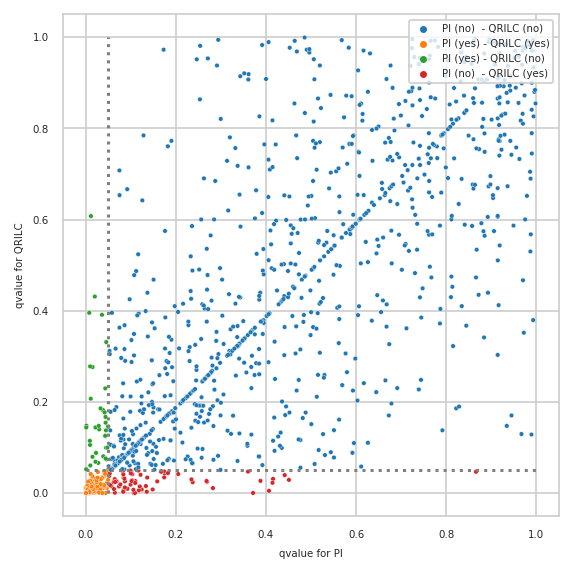

In [20]:
figsize = (4, 4)
size = 5
fig, ax = plt.subplots(figsize=figsize)
x_col = to_plot.columns[0]
y_col = to_plot.columns[1]
ax = sns.scatterplot(data=to_plot,
                     x=x_col,
                     y=y_col,
                     s=size,
                     hue='Differential Analysis Comparison',
                     ax=ax)
_ = ax.legend(fontsize=fontsize,
              title_fontsize=fontsize,
              markerscale=0.4,
              title='',
              )
ax.set_xlabel(f"qvalue for {x_col}")
ax.set_ylabel(f"qvalue for {y_col}")
ax.hlines(0.05, 0, 1, color='grey', linestyles='dotted')
ax.vlines(0.05, 0, 1, color='grey', linestyles='dotted')
sns.move_legend(ax, "upper right")
files_out[f'diff_analysis_comparision_1_{args.model_key}'] = (
    args.out_folder /
    f'diff_analysis_comparision_1_{args.model_key}')
fname = files_out[f'diff_analysis_comparision_1_{args.model_key}']
vaep.savefig(fig, name=fname)

- also showing how many features were measured ("observed") by size of circle

vaep.plotting - INFO     Saved Figures to runs/alzheimer_study/diff_analysis/AD/PI_vs_QRILC/diff_analysis_comparision_2_QRILC


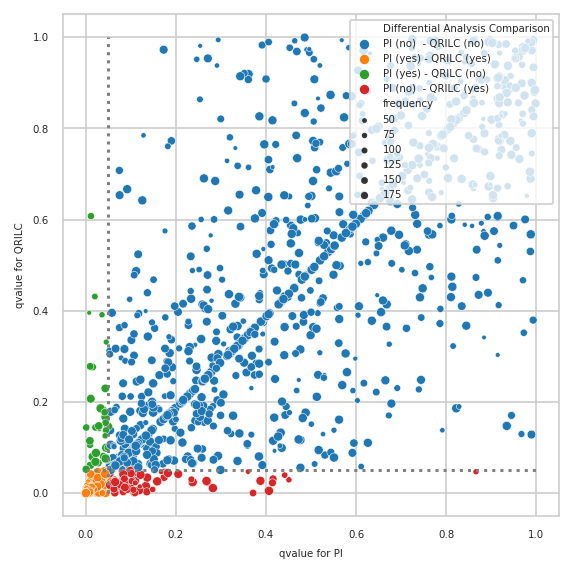

In [21]:
fig, ax = plt.subplots(figsize=figsize)
ax = sns.scatterplot(data=to_plot,
                     x=to_plot.columns[0],
                     y=to_plot.columns[1],
                     size='frequency',
                     s=size,
                     sizes=(5, 20),
                     hue='Differential Analysis Comparison')
_ = ax.legend(fontsize=fontsize,
              title_fontsize=fontsize,
              markerscale=0.6,
              title='',
              )
ax.set_xlabel(f"qvalue for {x_col}")
ax.set_ylabel(f"qvalue for {y_col}")
ax.hlines(0.05, 0, 1, color='grey', linestyles='dotted')
ax.vlines(0.05, 0, 1, color='grey', linestyles='dotted')
sns.move_legend(ax, "upper right")
files_out[f'diff_analysis_comparision_2_{args.model_key}'] = (
    args.out_folder / f'diff_analysis_comparision_2_{args.model_key}')
vaep.savefig(
    fig, name=files_out[f'diff_analysis_comparision_2_{args.model_key}'])

## Only features contained in model
- this block exist due to a specific part in the ALD analysis of the paper

In [22]:
scores_model_only = scores.reset_index(level=-1, drop=True)
_diff = scores_model_only.index.difference(scores_common.index)
if not _diff.empty:
    scores_model_only = (scores_model_only
                         .loc[
                             _diff,
                             args.model_key]
                         .sort_values(by='qvalue', ascending=True)
                         .join(freq_feat.squeeze().rename(freq_feat.columns.droplevel()[0])
                               )
                         )
    display(scores_model_only)
else:
    scores_model_only = None
    logger.info("No features only in new comparision model.")

if not _diff.empty:
    scores_model_only.to_excel(writer, 'only_model', **writer_args)
    display(scores_model_only.rejected.value_counts())
    scores_model_only_rejected = scores_model_only.loc[scores_model_only.rejected]
    scores_model_only_rejected.to_excel(
        writer, 'only_model_rejected', **writer_args)

root - INFO     No features only in new comparision model.


## DISEASES DB lookup

Query diseases database for gene associations with specified disease ontology id.

In [23]:
data = vaep.databases.diseases.get_disease_association(
    doid=args.disease_ontology, limit=10000)
data = pd.DataFrame.from_dict(data, orient='index').rename_axis('ENSP', axis=0)
data = data.rename(columns={'name': args.annotaitons_gene_col}).reset_index(
).set_index(args.annotaitons_gene_col)
data

,ENSP,score
None,,
PSEN2,ENSP00000355747,5.000
APOE,ENSP00000252486,5.000
PSEN1,ENSP00000326366,5.000
APP,ENSP00000284981,5.000
CLU,ENSP00000315130,4.263
...,...,...
HBS1L,ENSP00000356811,0.508
SMAD9,ENSP00000369154,0.506
ANKRD11,ENSP00000301030,0.505


## Shared features
ToDo: new script -> DISEASES DB lookup

In [24]:
feat_name = scores.index.names[0]  # first index level is feature name
if args.annotaitons_gene_col in scores.index.names:
    logger.info(f"Found gene annotation in scores index:  {scores.index.names}")
else:
    logger.info(f"No gene annotation in scores index:  {scores.index.names}"
                " Exiting.")
    import sys
    sys.exit(0)

root - INFO     No gene annotation in scores index:  ['protein groups', 'Source'] Exiting.


SystemExit: 0

/usr/share/miniconda3/envs/vaep/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3516: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


In [ ]:
gene_to_PG = (scores.droplevel(
    list(set(scores.index.names) - {feat_name, args.annotaitons_gene_col})
)
    .index
    .to_frame()
    .reset_index(drop=True)
    .set_index(args.annotaitons_gene_col)
)
gene_to_PG.head()

In [ ]:
disease_associations_all = data.join(
    gene_to_PG).dropna().reset_index().set_index(feat_name).join(annotations)
disease_associations_all

## only by model

In [ ]:
idx = disease_associations_all.index.intersection(scores_model_only.index)
disease_assocications_new = disease_associations_all.loc[idx].sort_values(
    'score', ascending=False)
disease_assocications_new.head(20)

In [ ]:
mask = disease_assocications_new.loc[idx, 'score'] >= 2.0
disease_assocications_new.loc[idx].loc[mask]

## Only by model which were significant

In [ ]:
idx = disease_associations_all.index.intersection(
    scores_model_only_rejected.index)
disease_assocications_new_rejected = disease_associations_all.loc[idx].sort_values(
    'score', ascending=False)
disease_assocications_new_rejected.head(20)

In [ ]:
mask = disease_assocications_new_rejected.loc[idx, 'score'] >= 2.0
disease_assocications_new_rejected.loc[idx].loc[mask]

## Shared which are only significant for by model

In [ ]:
mask = (scores_common[(str(args.model_key), 'rejected')] & mask_different)
mask.sum()

In [ ]:
idx = disease_associations_all.index.intersection(mask.index[mask])
disease_assocications_shared_rejected_by_model = (disease_associations_all.loc[idx].sort_values(
    'score', ascending=False))
disease_assocications_shared_rejected_by_model.head(20)

In [ ]:
mask = disease_assocications_shared_rejected_by_model.loc[idx, 'score'] >= 2.0
disease_assocications_shared_rejected_by_model.loc[idx].loc[mask]

## Only significant by RSN

In [ ]:
mask = (scores_common[(str(args.baseline), 'rejected')] & mask_different)
mask.sum()

In [ ]:
idx = disease_associations_all.index.intersection(mask.index[mask])
disease_assocications_shared_rejected_by_RSN = (
    disease_associations_all
    .loc[idx]
    .sort_values('score', ascending=False))
disease_assocications_shared_rejected_by_RSN.head(20)

In [ ]:
mask = disease_assocications_shared_rejected_by_RSN.loc[idx, 'score'] >= 2.0
disease_assocications_shared_rejected_by_RSN.loc[idx].loc[mask]

## Write to excel

In [ ]:
disease_associations_all.to_excel(
    writer, sheet_name='disease_assoc_all', **writer_args)
disease_assocications_new.to_excel(
    writer, sheet_name='disease_assoc_new', **writer_args)
disease_assocications_new_rejected.to_excel(
    writer, sheet_name='disease_assoc_new_rejected', **writer_args)

## Outputs

In [ ]:
writer.close()
files_out